### Import the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

### Importing the Data

In [2]:
raw_data = pd.read_csv("Index2018.csv")

In [3]:
df = raw_data.copy()

### Examining the Data

In [4]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
date      6269 non-null object
spx       6269 non-null float64
dax       6269 non-null float64
ftse      6269 non-null float64
nikkei    6269 non-null float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


**Date -> Date,
  spx -> S&P 500 USA Market index,
  dax -> Dax 30 Germany Market index,
  ftse -> FTSE 100 UK Market Index,
  nikkei -> NIKKEI Japan 225 Market Index**

In [6]:
df.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [7]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [8]:
df.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Plotting the Data

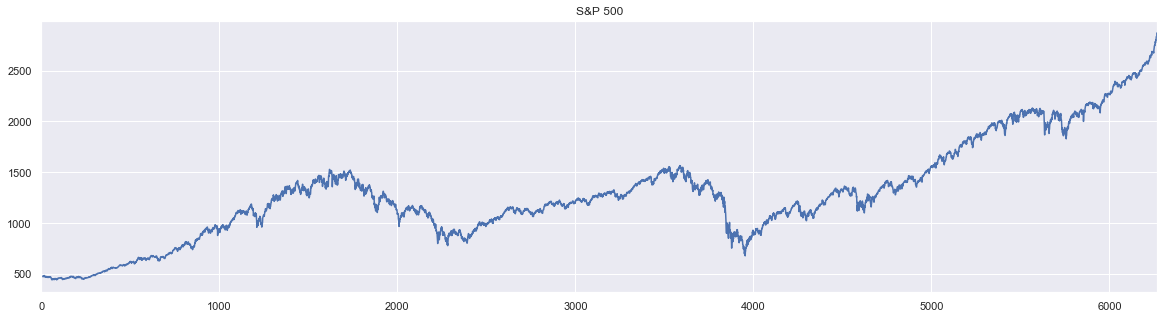

In [9]:
df.spx.plot(figsize=(20,5),title="S&P 500")

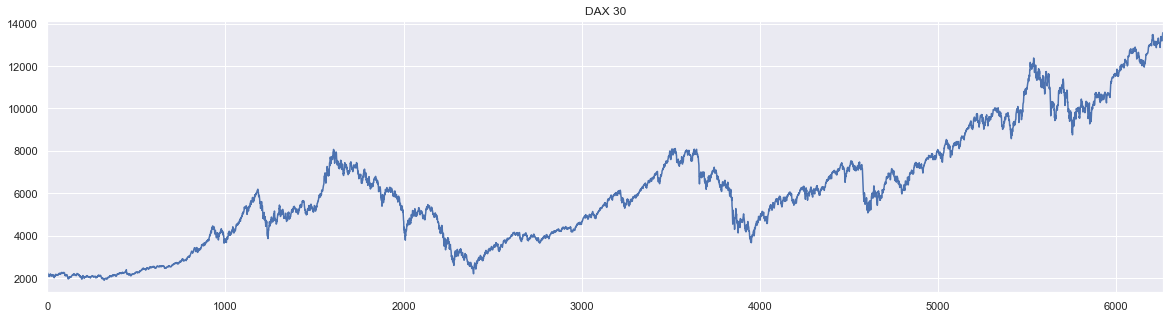

In [10]:
df.dax.plot(figsize=(20,5),title="DAX 30")

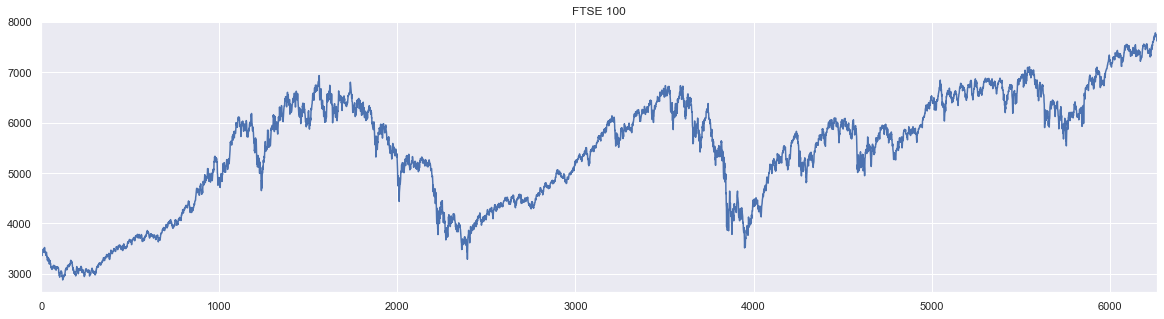

In [11]:
df.ftse.plot(figsize=(20,5),title="FTSE 100")

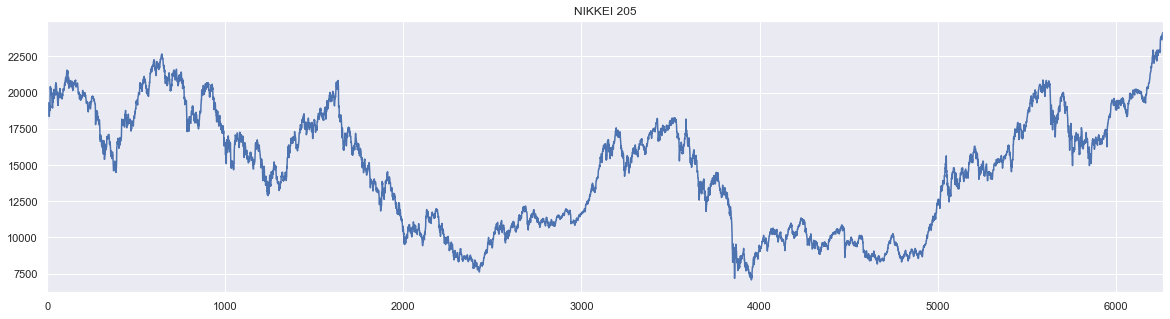

In [12]:
df.nikkei.plot(figsize=(20,5),title="NIKKEI 205")

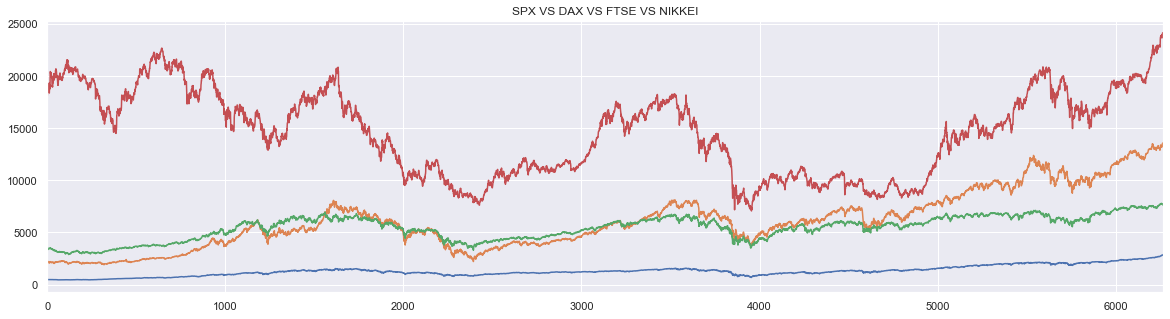

In [13]:
plt.figure(figsize=(20,5))
df.spx.plot()
df.dax.plot()
df.ftse.plot()
df.nikkei.plot()
plt.title("SPX VS DAX VS FTSE VS NIKKEI")
plt.show()

### The QQ Plot

In [14]:
import scipy.stats
import pylab

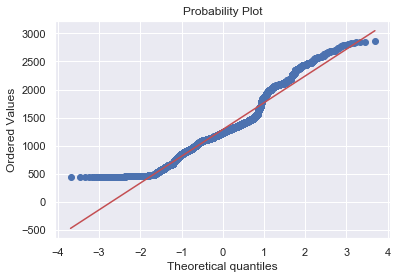

In [15]:
scipy.stats.probplot(df.spx,plot=pylab)
pylab.show()

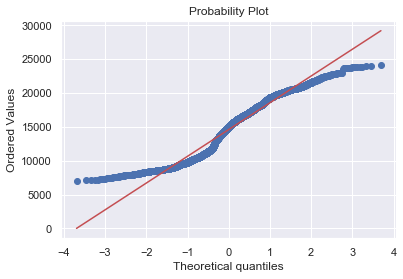

In [16]:
scipy.stats.probplot(df.nikkei,plot=pylab)
pylab.show()

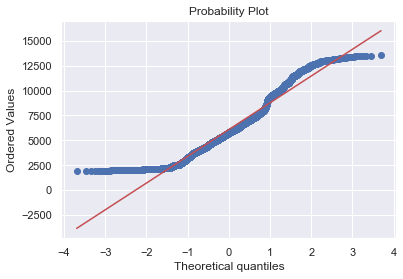

In [17]:
scipy.stats.probplot(df.dax,plot=pylab)
pylab.show()

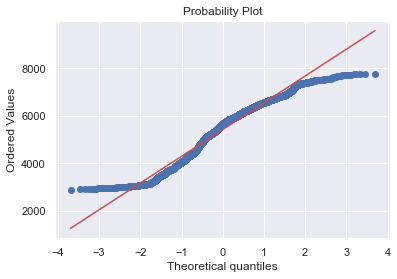

In [18]:
scipy.stats.probplot(df.ftse,plot=pylab)
pylab.show()

### Convert date to datetime

In [19]:
df.date = pd.to_datetime(df.date,dayfirst=True)

In [20]:
print(df.date.dtypes)

datetime64[ns]


### Check the time period

In [21]:
df.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [22]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting up date as index

In [23]:
df.set_index("date",inplace=True)

In [24]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting up frequency

In [25]:
df = df.asfreq('b')

In [26]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [27]:
df.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

### Fill the missing values

In [28]:
# Fill the missing value to the last known value of this collumn
df.spx = df.spx.fillna(method="ffill")
df.dax = df.dax.fillna(method="ffill")
df.ftse = df.ftse.fillna(method="ffill")
df.nikkei = df.nikkei.fillna(method="ffill")

In [29]:
df.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Simplify the data

In [30]:
# Lets create a column for market value of ftse
df["market_value"]=df.spx

In [31]:
df.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17
1994-01-13,472.47,2142.37,3360.01,18577.26,472.47


In [32]:
### Lets remove the collumn except market_value
del df["spx"],df["dax"],df["ftse"],df["nikkei"]

In [33]:
df.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### Spliting data train and test

In [34]:
size = int(len(df)*.80)

In [35]:
train = df.iloc[:size] # 80% of train data

In [36]:
test = df.iloc[size:] # 20% of test data

In [37]:
train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [38]:
test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### White Noise

In [39]:
wn = np.random.normal(loc=train.market_value.mean(),scale=train.market_value.std(),size=len(train))

In [40]:
# Lets add column in the train data set
train["wn"] = wn

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
train.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1087.273044
std,292.559287,296.998608
min,438.920000,96.012025
25%,914.620000,881.176703
50%,1144.650000,1084.237644
75%,1316.280729,1286.783702
max,1570.252238,2185.885893


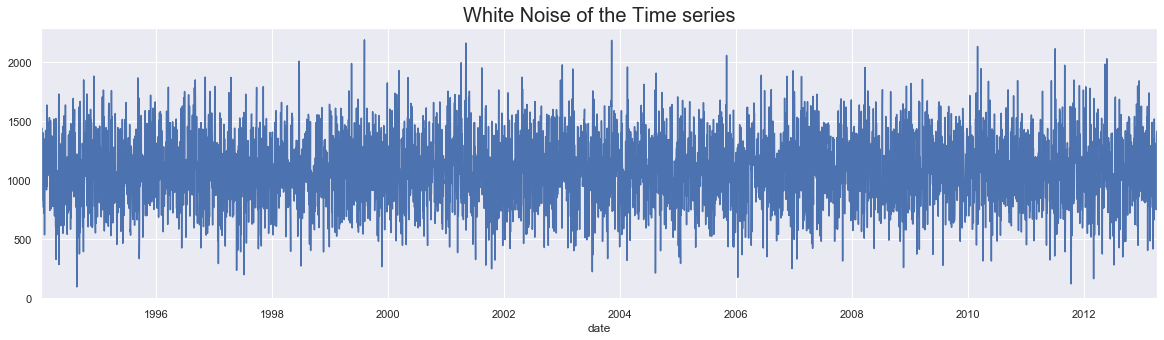

In [42]:
# Plot the white noise
train.wn.plot(figsize=(20,5))
plt.title("White Noise of the Time series",size=20)
plt.show()

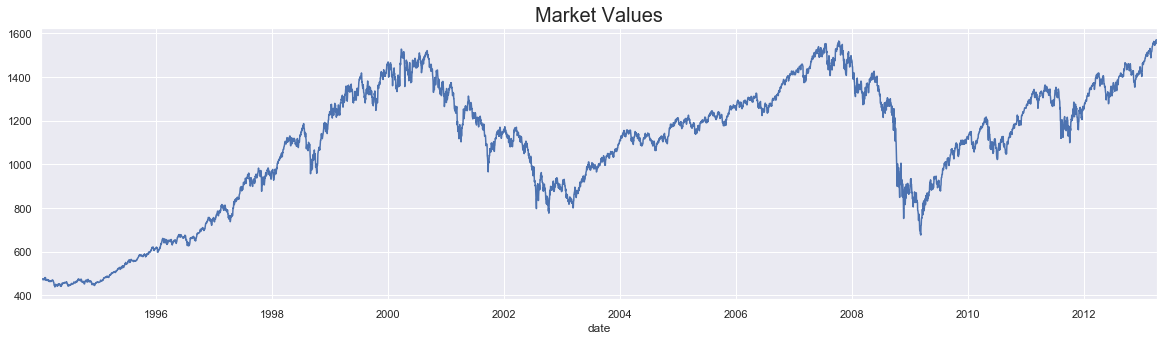

In [43]:
# Plot the market value
train.market_value.plot(figsize=(20,5))
plt.title("Market Values",size=20)
#plt.ylim(1000,9025) # Scale as the same of white noise
plt.show()

### Random Walk

In [44]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date,dayfirst=True)
rw.set_index("date",inplace=True)
rw = rw.asfreq("b")

In [45]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [46]:
train["rw"]=rw.price

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
train.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1467.666587,1122.139662
1994-01-10,475.27,1105.090285,1080.347860
1994-01-11,474.13,1440.839357,1082.095245
1994-01-12,474.17,1112.182114,1083.639265
1994-01-13,472.47,1012.417403,1067.146255


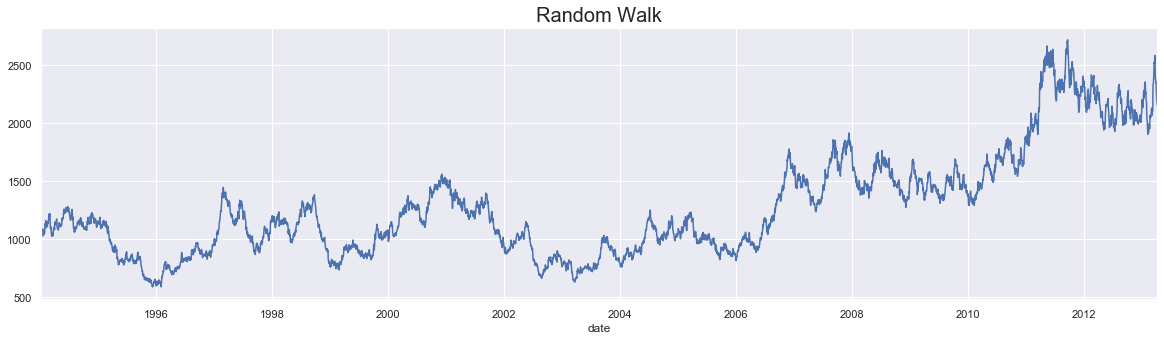

In [48]:
# Plot the Random walk
train.rw.plot(figsize=(20,5))
plt.title("Random Walk",size=20)
plt.show()

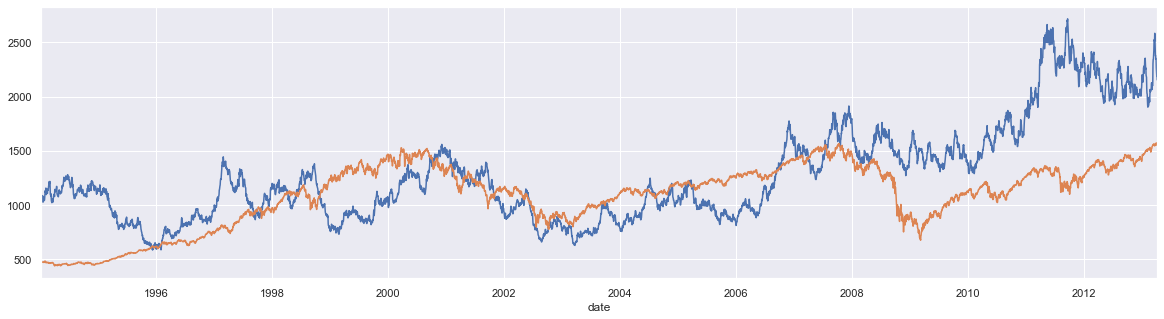

In [49]:
# Lets plot rw and market_value together
plt.figure(figsize=(20,5))
train.rw.plot()
train.market_value.plot()
plt.show()

### Stationarity

In [50]:
# Import necessary package
import statsmodels.tsa.stattools as sts

In [51]:
# Dicky-Fuller test for market value
sts.adfuller(train.market_value)

(-1.7369847452352423,
 0.41216456967706283,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

**Critical value of dicky-fuller test : -1.7369847452352423,   P-value associated with t-stats :  0.41216456967706283,  Number of lags used regression : 18,   Number of observation used in the analysis : 5002**


In [52]:
# Dicky-Fuller test for White Noise
sts.adfuller(train.wn)

(-30.30511201328203,
 0.0,
 4,
 5016,
 {'1%': -3.431654355990492,
  '5%': -2.862116384706994,
  '10%': -2.5670768102089263},
 70964.08565269918)

In [53]:
# Dicky-Fuller test for random walk
sts.adfuller(train.rw)

(-1.3286073927689714,
 0.6159849181617386,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonility

In [54]:
# Import package
from statsmodels.tsa.seasonal import seasonal_decompose

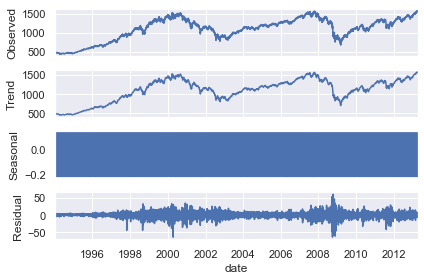

In [55]:
# Additive seasonal decompose of market value
s_dec_additive = seasonal_decompose(train.market_value,model="additive")

# Lets plot this
s_dec_additive.plot()
plt.show()

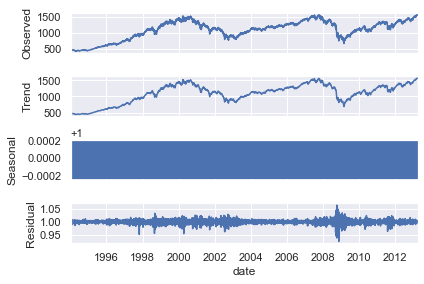

In [56]:
# Multiplicative seasonal decompose of market value
s_dec_multiplicative = seasonal_decompose(train.market_value,model="multiplicative")

# Lets plot this
s_dec_multiplicative.plot()
plt.show()

**Both decomposition seasonal sequence has no clear pattern and Trend closely represents as observed series So, There is no Seasonality among S&P**

### ACF (Autocorrelation Function)

In [57]:
# Import package
import statsmodels.graphics.tsaplots as sgt

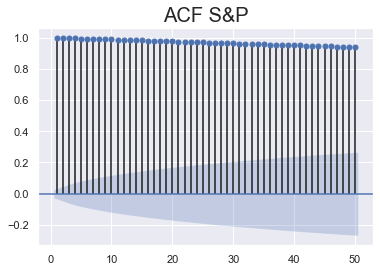

In [58]:
# ACF plot for market value
sgt.plot_acf(train.market_value,lags=50,unbiased=True,zero=False)
plt.title("ACF S&P",size=20)
plt.show()

**We see that there Autocorrelation of S&P price. Because in every lag there correlation with the previous lags**

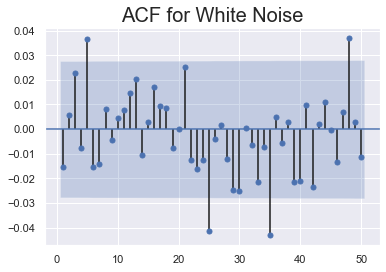

In [59]:
# ACF plot for White Noise
sgt.plot_acf(train.wn,lags=50,unbiased=True,zero=False)
plt.title("ACF for White Noise",size=20)
plt.show()

**No Autocorrelation of White Noise**

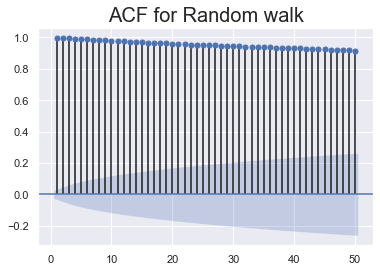

In [60]:
# ACF plot for Random Walk
sgt.plot_acf(train.rw,lags=50,unbiased=True,zero=False)
plt.title("ACF for Random walk",size=20)
plt.show()

**There ACF in Random walk**

### PACF(Partial AutoCorrelation Function)

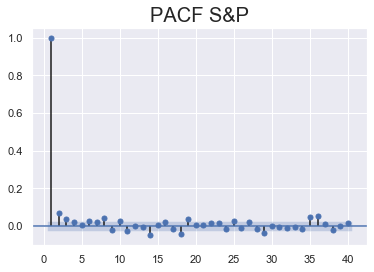

In [61]:
# PACF plot for Market value
sgt.plot_pacf(train.market_value,lags=40,zero=False,method=("ols"))
plt.title("PACF S&P",size=20)
plt.show()

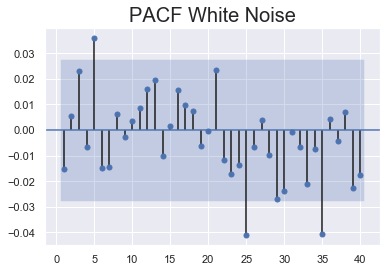

In [62]:
# PACF plot for White Noise
sgt.plot_pacf(train.wn,lags=40,zero=False,method=("ols"))
plt.title("PACF White Noise",size=20)
plt.show()

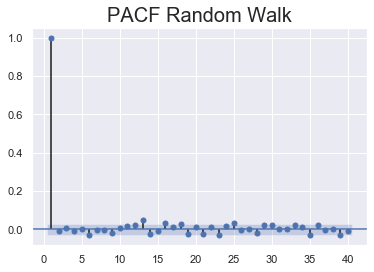

In [63]:
# PACF plot for Random Walk
sgt.plot_pacf(train.rw,lags=40,zero=False,method=("ols"))
plt.title("PACF Random Walk",size=20)
plt.show()

# Model Building

### Data Preprocessing

In [64]:
df_c=raw_data.copy() # Copy data set
df_c.date = pd.to_datetime(df_c.date, dayfirst = True) # Convert date column object to DateTime
df_c.set_index("date", inplace=True) # Take data set into time series, set index date
df_c=df_c.asfreq('b') # Set frequency as business day ("b")
df_c=df_c.fillna(method='ffill') # Fill missing value with "ffill"

### Create a column market value as FTSE

In [65]:
df_c["market_value"]=df_c.ftse

### Delete  all column except market_value

In [66]:
del df_c['spx']
del df_c['dax']
del df_c['ftse']
del df_c['nikkei']

### Split data into train and test 

In [67]:
size = int(len(df_c)*0.8)
df_train, df_test = df_c.iloc[:size], df_c.iloc[size:]

### ACF of FTSE

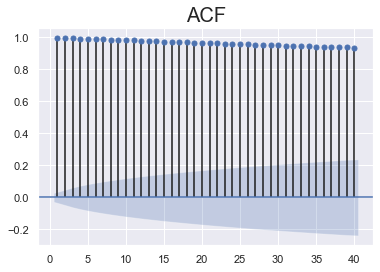

In [68]:
sgt.plot_acf(df_train.market_value,lags=40,zero=False)
plt.title("ACF",size=20)
plt.show()

### PACF of FTSE

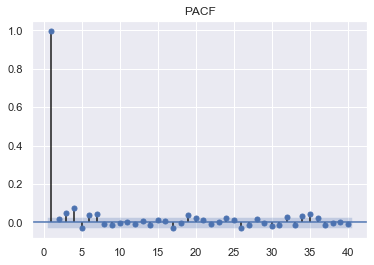

In [69]:
sgt.plot_pacf(df_train.market_value,lags=40,zero=False,method=("ols"))
plt.title("PACF")
plt.show()

### The AR(1) Model

In [70]:
# Import package
from statsmodels.tsa.arima_model import ARMA

In [71]:
model_ar = ARMA(df_train.market_value,order=(1,0))


In [72]:
result_ar = model_ar.fit()

In [73]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Thu, 02 Apr 2020   AIC                          55251.195
Time:                        13:23:53   BIC                          55270.759
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5038.0834    487.182     10.341      0.000    4083.225    5992.942
ar.L1.market_value     0.9985      0.001   1298.634      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [74]:
model_ar_2 = ARMA(df_train.market_value, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Thu, 02 Apr 2020   AIC                          55251.742
Time:                        13:23:53   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    495.684     10.268      0.000    4118.119    6061.164
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4633           +0.0000j           58.4633            0.5000
-----------------------------------------------------------------------------
"""

### Logliklihood ratio test

In [75]:
from scipy.stats.distributions import chi2

**In this test we will compare model with its next period model**

In [76]:
def LLR_test(i,j,data,DF=1): # i and j are the period of time, DF is frequency
    # MOdel of i period
    model_ar_1 = ARMA(data, order=(i,0)) 
    # LLF for model of i period
    L1 = model_ar_1.fit().llf
    
    # Model of j period
    model_ar_2 = ARMA(data, order=(j,0))
    # LLF for model of j period
    L2 = model_ar_2.fit().llf
    
    # Calculate the Logliklihood ratio 
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p
    

In [77]:
LLR_test(i=3,j=4,data=df_train.market_value)

0.0

In [78]:
# Model summary of i period and Loglikelihood test between i and i-1
def ar(i,data):
    model_ar = ARMA(data, order=(i,0))
    results_ar = model_ar.fit()
    print(results_ar.summary())
    print("LLR test between model_ar_"+str(i-1)+" and model_ar_"+str(i)+" : " ,str(LLR_test(i=i-1,j=i,data=data)))

In [79]:
# Lets Print 1 to 9 period model summary and Loglikelihood between every time period with its previous time period model
for i in range(1,10):
    print("\n")
    ar(i=i,data=df_train.market_value)



                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Thu, 02 Apr 2020   AIC                          55251.195
Time:                        13:23:56   BIC                          55270.759
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5038.0834    487.182     10.341      0.000    4083.225    5992.942
ar.L1.market_value     0.9985      0.001   1298.634      0.000       0.997       1.000
                  

LLR test between model_ar_4 and model_ar_5 :  0.035


                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Thu, 02 Apr 2020   AIC                          55208.947
Time:                        13:24:09   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6415    565.261      9.004      0.000    3981.750    6197.533
ar.L1.market_value     0.9803      0.014     69.604  

LLR test between model_ar_8 and model_ar_9 :  0.288


### The DF test

In [80]:
sts.adfuller(df_train.market_value)

(-1.9041551418836884,
 0.3301089327702823,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

### Using returns

#### Returns -> The % of change between the values for two consecutive periods

**Positive returns increase the price, Negative returns decrease the price**

((Pt -P(t-1))/P(t-1))*100

In [81]:
df_train["returns"] = df_train.market_value.pct_change(1).mul(100)

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
df_train.head()

,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


In [83]:
# First return value is null .Because there no market value previous the first index.
# Lets remove the first index
df_train = df_train.iloc[1:]

In [84]:
df_train.head()

,market_value,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842


In [85]:
# Lets check DF test on returns
sts.adfuller(df_train.returns)

(-12.770265719497234,
 7.79805833603833e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

### ACF of returns

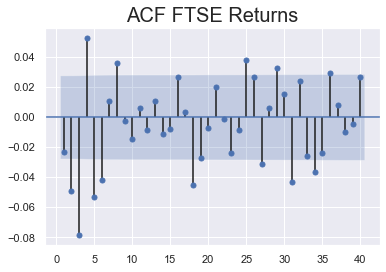

In [86]:
sgt.plot_acf(df_train.returns,lags=40,zero=False)
plt.title("ACF FTSE Returns",size=20)
plt.show()

### PACF of returns

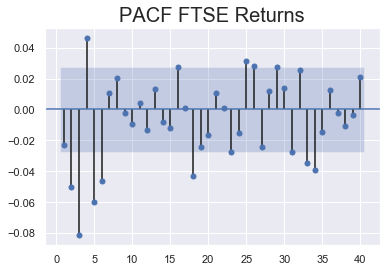

In [87]:
sgt.plot_pacf(df_train.returns,lags=40,zero=False,method=("ols"))
plt.title("PACF FTSE Returns",size=20)
plt.show()

### AR(1) Model for returns 

In [88]:
model_return_ar_1 = ARMA(df_train.returns, order=(1,0))
results_return_ar_1 = model_return_ar_1.fit()
print(results_return_ar_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Thu, 02 Apr 2020   AIC                          15865.497
Time:                        13:24:53   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Root

**P Values of both parameter are over 0.05. Thus Neither is significantly different from 0. So this model doesn't hold real predictive power**

**The more easily the yestarday's price is affected by higher lags, the more inaccurate its coefficients becomes**

#### Higher lag AR Model for returns

In [89]:
model_return_ar_1 = ARMA(df_train.returns, order=(1,0))
results_return_ar_1 = model_return_ar_1.fit()
print(results_return_ar_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Thu, 02 Apr 2020   AIC                          15865.497
Time:                        13:24:53   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Root

In [90]:
# Lets try for  2 to 10 lag and their LLR_test
for i in range(2,10):
    ar(i=i,data=df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Thu, 02 Apr 2020   AIC                          15854.911
Time:                        13:24:53   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     

LLR test between model_ar_5 and model_ar_6 :  0.001
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Thu, 02 Apr 2020   AIC                          15791.294
Time:                        13:25:00   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052 

LLR test between model_ar_8 and model_ar_9 :  0.885


### Normalizing value

**The % of the first value of the set**

In [91]:
benchmark_m = df_train.market_value.iloc[0]
benchmark_m

3440.58

In [92]:
# Create a column norm 
df_train["norm"] = df_train.market_value.div(benchmark_m).mul(100)

In [93]:
# DF test
sts.adfuller(df_train.norm)

(-1.8928710132672324,
 0.3354222074330083,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [94]:
benchmark_re = df_train.returns.iloc[0]
df_train["norm_res"] = df_train.returns.div(benchmark_re).mul(100)
sts.adfuller(df_train.norm_res)

(-12.7702657194973,
 7.798058336035981e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

### AR model on norm_res 

In [95]:
model_return_norm_ar_1 = ARMA(df_train.norm_res, order=(1,0))
results_return_norm_ar_1 = model_return_norm_ar_1.fit()
print(results_return_norm_ar_1.summary())

                              ARMA Model Results                              
Dep. Variable:               norm_res   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40351.743
Method:                       css-mle   S.D. of innovations            749.388
Date:                Thu, 02 Apr 2020   AIC                          80709.487
Time:                        13:25:13   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731     10.339     -1.158      0.247     -32.237       8.291
ar.L1.norm_res    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    

In [96]:
model_return_norm_ar_6 = ARMA(df_train.norm_res, order=(6,0))
results_return_norm_ar_6 = model_return_norm_ar_6.fit()
print(results_return_norm_ar_6.summary())

                              ARMA Model Results                              
Dep. Variable:               norm_res   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood              -40308.940
Method:                       css-mle   S.D. of innovations            743.021
Date:                Thu, 02 Apr 2020   AIC                          80633.879
Time:                        13:25:14   BIC                          80686.048
Sample:                    01-10-1994   HQIC                         80652.160
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.2020      8.536     -1.429      0.153     -28.933       4.529
ar.L1.norm_res    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.norm_res    -0.0523      0.014

In [97]:
model_return_norm_ar_7 = ARMA(df_train.norm_res, order=(7,0))
results_return_norm_ar_7 = model_return_norm_ar_7.fit()
print(results_return_norm_ar_7.summary())

                              ARMA Model Results                              
Dep. Variable:               norm_res   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -40308.642
Method:                       css-mle   S.D. of innovations            742.977
Date:                Thu, 02 Apr 2020   AIC                          80635.283
Time:                        13:25:15   BIC                          80693.974
Sample:                    01-10-1994   HQIC                         80655.849
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.630     -1.387      0.165     -28.887       4.941
ar.L1.norm_res    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.norm_res    -0.0517      0.014

In [98]:
LLR_test(6,7,df_train.norm_res)

0.44

**There no model improvement between returns and its normal value. The model accuracy LLR test are same**

**Using normalize value there no impact on model selection**

### Analysing the residuals

In [99]:
# We observed that model_ar_7 give us better result for market_value

model_ar_7 = ARMA(df_train.market_value, order=(7,0))
results_ar_7 = model_ar_7.fit()

In [100]:
df_train["res_mv"]=results_ar_7.resid

In [101]:
df_train.head()

,market_value,returns,norm,norm_res,res_mv
date,,,,,
1994-01-10,3440.58,-0.156704,100.000000,100.000000,-1649.389037
1994-01-11,3413.77,-0.779229,99.220771,497.260711,-29.205607
1994-01-12,3372.02,-1.222988,98.007313,780.443046,-44.604127
1994-01-13,3360.01,-0.356166,97.658244,227.285567,-16.412201
1994-01-14,3400.56,1.206842,98.836824,-770.139292,34.055986


In [102]:
print("Mean : ",df_train.res_mv.mean())
print("Variance : ",df_train.res_mv.var())

Mean :  0.35255472613670946
Variance :  4010.4842429316095


**The mean is close to zero, That means on avarage our model performs well but High variance indicated the residuals are not consentrate around mean zero. Thats why it gave us poor result while predicting non stationary data**

In [103]:
# DF test of res_mv
sts.adfuller(df_train.res_mv)

(-75.96947370105393,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54832.42172144246)

**P = 0 its suggest stationarity**

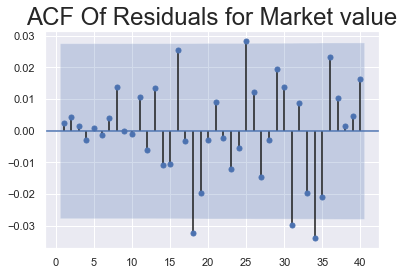

In [104]:
sgt.plot_acf(df_train.res_mv, zero = False, lags = 40)
plt.title("ACF Of Residuals for Market value",size=24)
plt.show()

**Most of the coefficient are in the Blue region, That suggests those are not significantly different from 0. Which means the charecteristics of White noise. However there some of them outside the blu region that indicates there might be better predictor**

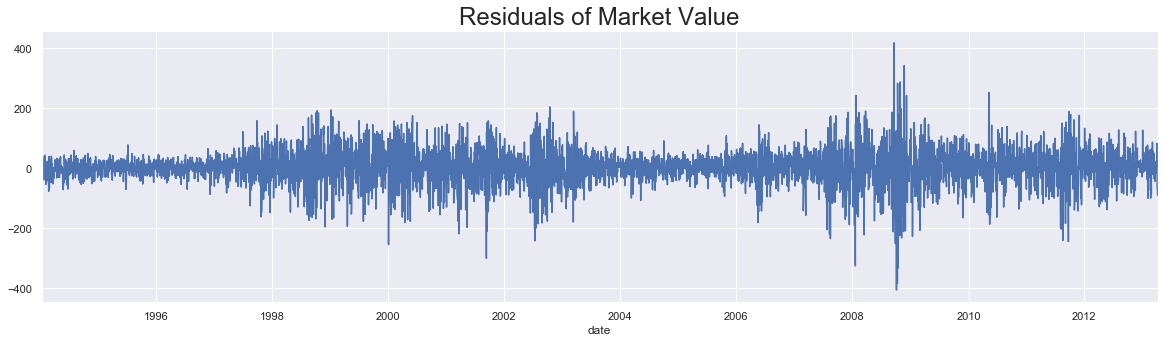

In [105]:
# Plot the res_mv
df_train.res_mv[1:].plot(figsize=(20,5))
plt.title("Residuals of Market Value", size=24)
plt.show()

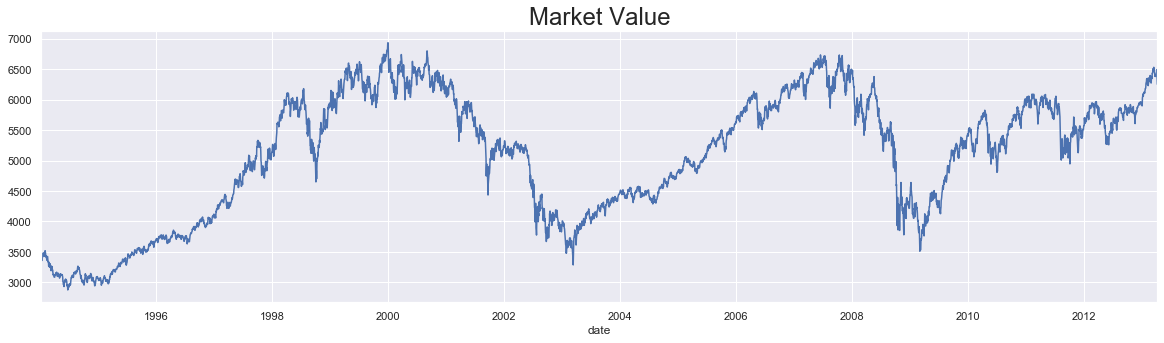

In [106]:
# Plot the marktet value
df_train.market_value.plot(figsize=(20,5))
plt.title("Market Value", size=24)
plt.show()

**Residual market value plot are not like the market value plot.They are far different**

In [107]:
# We obsrved that model_return_ar_6 give us better result for return value
model_return_ar_6 = ARMA(df_train.returns,order=(6,0))
df_train["res_return"]=model_return_ar_6.fit().resid

In [108]:
df_train.head()

,market_value,returns,norm,norm_res,res_mv,res_return
date,,,,,,
1994-01-10,3440.58,-0.156704,100.000000,100.000000,-1649.389037,-0.175623
1994-01-11,3413.77,-0.779229,99.220771,497.260711,-29.205607,-0.802198
1994-01-12,3372.02,-1.222988,98.007313,780.443046,-44.604127,-1.270028
1994-01-13,3360.01,-0.356166,97.658244,227.285567,-16.412201,-0.466065
1994-01-14,3400.56,1.206842,98.836824,-770.139292,34.055986,1.061277


In [109]:
print("Mean : ",df_train.res_return.mean())
print("Variance : ",df_train.res_return.var())

Mean :  -5.3730302400295284e-05
Variance :  1.3559802110752588


**Mean is close to zero and variance is around 1 indicates us the model we choose is pretty good**

In [110]:
#DF Test for res_return
sts.adfuller(df_train.res_return)

(-70.78379724311958,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570834234799)

**res_mv and res_return DF test results are same. So its indicates data is stationary**

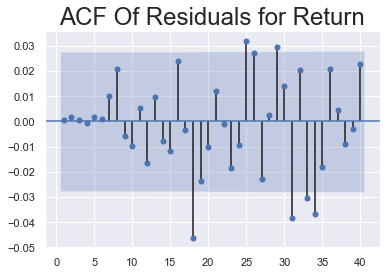

In [111]:
sgt.plot_acf(df_train.res_return, zero = False, lags = 40)
plt.title("ACF Of Residuals for Return",size=24)
plt.show()

**This is pretty similiar with the Residuals for market value plot. Though its a good model but we have reason to believe there better model exist**

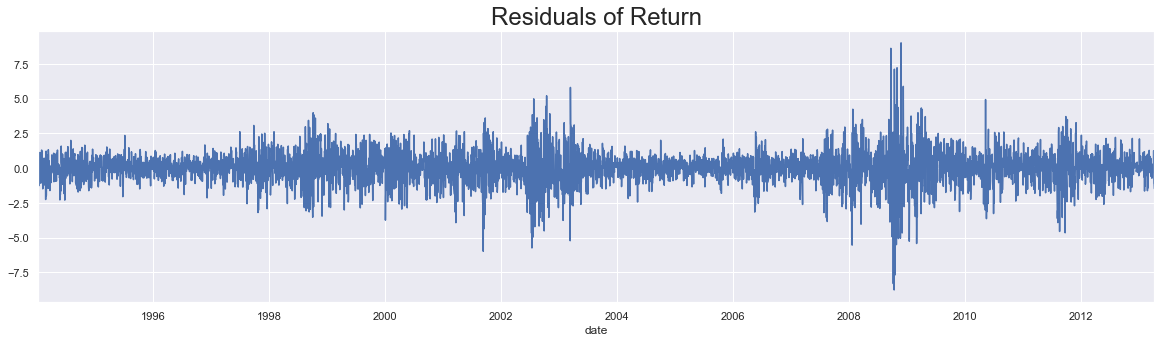

In [112]:
# Plot the res_return
df_train.res_return.plot(figsize=(20,5))
plt.title("Residuals of Return", size=24)
plt.show()

## MA(Moving Avarage model) model

#### ACF plot of returns

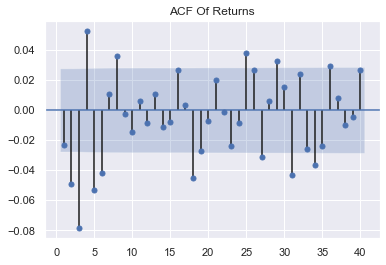

In [113]:
sgt.plot_acf(df_train.returns,zero= False,lags=40)
plt.title("ACF Of Returns")
plt.show()

### MA(1) model

In [114]:
model_res_ma_1 = ARMA(df_train.returns,order=(0,1))
result_ma_1 = model_res_ma_1.fit()
result_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Thu, 02 Apr 2020   AIC                          15865.190
Time:                        13:25:24   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.086      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8547           +0.0000j           38.8547            0.0000
-----------------------------------------------------------------------------
"""

### Higher lag MA model

In [115]:
def LLR_test_ma(i,j,data,DF=1): # i and j are the period of time, DF is frequency
    # MOdel of i period
    model_ma_1 = ARMA(data, order=(0,i)) 
    # LLF for model of i period
    L1 = model_ma_1.fit().llf
    
    # Model of j period
    model_ma_2 = ARMA(data, order=(0,j))
    # LLF for model of j period
    L2 = model_ma_2.fit().llf
    
    # Calculate the Logliklihood ratio 
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p
    

In [116]:
# Model summary of i period and Loglikelihood test between i and i-1
def ma(i,data):
    model_ma = ARMA(data, order=(0,i))
    results_ma = model_ma.fit()
    print(results_ma.summary())
    print("LLR test between model_ma_"+str(i-1)+" and model_ma_"+str(i)+" : " ,str(LLR_test_ma(i=i-1,j=i,data=data)))

In [117]:
ma(2,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Thu, 02 Apr 2020   AIC                          15853.728
Time:                        13:25:25   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

In [118]:
ma(3,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Thu, 02 Apr 2020   AIC                          15818.634
Time:                        13:25:26   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

In [119]:
ma(3,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Thu, 02 Apr 2020   AIC                          15818.634
Time:                        13:25:28   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

In [120]:
ma(4,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Thu, 02 Apr 2020   AIC                          15809.547
Time:                        13:25:30   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     

In [121]:
ma(5,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Thu, 02 Apr 2020   AIC                          15799.645
Time:                        13:25:33   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.returns    -0.0497      0.014     

In [122]:
ma(6,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Thu, 02 Apr 2020   AIC                          15794.442
Time:                        13:25:40   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

In [123]:
ma(7,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Thu, 02 Apr 2020   AIC                          15796.091
Time:                        13:25:49   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     

**ma_7 model P value = 0.554 which is not significant and LLR test result is also failed**

In [124]:
# Lets try with lag 8
ma(8,df_train.returns)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Thu, 02 Apr 2020   AIC                          15791.205
Time:                        13:26:03   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     

**We saw ma_8 model p value is significant and it passes LLR test**

### Compare ma_6 and ma_8 model

In [125]:
LLR_test_ma(6,8,df_train.returns,DF=2)

0.027

**ma_8 is better model then ma_6. So try again**

In [126]:
for i in range (9,12):
    ma(i,df_train.returns)
    print("\n")
    

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 9)   Log Likelihood               -7885.457
Method:                       css-mle   S.D. of innovations              1.164
Date:                Thu, 02 Apr 2020   AIC                          15792.914
Time:                        13:26:27   BIC                          15864.648
Sample:                    01-10-1994   HQIC                         15818.051
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ma.L2.returns    -0.0494      0.014     

LLR test between model_ma_10 and model_ma_11 :  0.444




**None of these models p values are significant so, we can choose model_8**

----

**when fitting the MA(Q) model, if the Qth lag is not significant in the ACF plot, The Qth coefficient of the summary table won't be significant as well**

### Residuals for Returns

In [128]:
model_res_ma_8 = ARMA(df_train.returns,order=(0,8))
result_ma_8 = model_res_ma_8.fit()

In [130]:
df_train['res_ret_ma_8'] = result_ma_8.resid

In [131]:
df_train.head()

,market_value,returns,norm,norm_res,res_mv,res_return,res_ret_ma_8
date,,,,,,,
1994-01-10,3440.58,-0.156704,100.000000,100.000000,-1649.389037,-0.175623,-0.175611
1994-01-11,3413.77,-0.779229,99.220771,497.260711,-29.205607,-0.802198,-0.802111
1994-01-12,3372.02,-1.222988,98.007313,780.443046,-44.604127,-1.270028,-1.269464
1994-01-13,3360.01,-0.356166,97.658244,227.285567,-16.412201,-0.466065,-0.464780
1994-01-14,3400.56,1.206842,98.836824,-770.139292,34.055986,1.061277,1.061816


In [135]:
print("Mean : ",round(df_train.res_ret_ma_8.mean(),3))
print("Variance : ",round(df_train.res_ret_ma_8.var(),3))
print("Standard diviation : ",round(df_train.res_ret_ma_8.std(),3))

Mean :  -0.0
Variance :  1.355
Standard diviation :  1.164


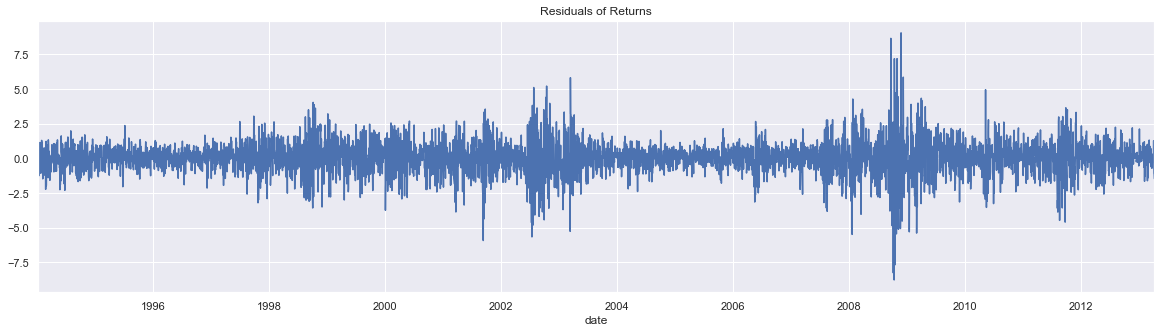

In [136]:
df_train.res_ret_ma_8.plot(figsize=(20,5))
plt.title("Residuals of Returns")
plt.show()

In [138]:
sts.adfuller(df_train.res_ret_ma_8)

(-70.83821801486906,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15689.88192007706)

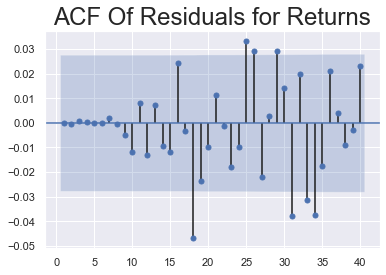

In [139]:
sgt.plot_acf(df_train.res_ret_ma_8, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()